### Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

### Data

In [55]:
train = pd.read_csv('../datasets/Selected train data.csv')
test = pd.read_csv('../datasets/Selected test data1.csv')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Preprocessing and Feature Engineering

In [23]:
train

Id  Overall Qual  Year Built  Full Bath  Half Bath  Garage Area  \
0      109             6        1976          2          1        475.0   
1      544             7        1996          2          1        559.0   
2      153             5        1953          1          0        246.0   
3      318             5        2006          2          1        400.0   
4      255             6        1900          2          0        484.0   
5      138             6        1966          2          1        578.0   
6     2827             6        2005          2          0        525.0   
7      145             5        1959          1          0        531.0   
8     1942             5        1952          1          0        420.0   
9     1956             5        1969          1          2        504.0   
10    1044             6        1971          1          1        264.0   
11    2752             7        2005          2          0        632.0   
12     807             5        1880          1          0        576.0   
13    1177             8        1999          2          1        480.0   
14    1480             7        2007          2          0        610.0   
15     324             5        2004          2          0        624.0   
16    1311             5        1916          1          0        513.0   
17     770             5        1963          1          0        480.0   
18    2063             6        1977          1          1        528.0   
19      69             7        2009          2          1        614.0   
20    2062             5        1968          1          0        450.0   
21     351             8        2000          2          0        499.0   
22    2393             8        2005          2          1        575.0   
23      12             6        1992          2          0        420.0   
24    2339             5        1955          1          0        572.0   
25     624             6        1961          2          0        530.0   
26      86             5        1965          1          0        336.0   
27    1534             5        1937          2          0        240.0   
28    2243             5        1895          2          0          0.0   
29    1957             5        1949          1          0        576.0   
30     380             8        1981          2          1        542.0   
31    2860             8        1929          1          0        400.0   
32    2517             8        1995          1          1        481.0   
33    1933             6        1952          1          0        410.0   
34     820             8        2007          2          0        826.0   
35     675             6        1958          1          0        384.0   
36    2910             5        1977          2          0        336.0   
37      21             6        1977          2          0        546.0   
38    1873             7        1973          1          1        528.0   
39    2125             5        1994          1          0        384.0   
40    1489             5        1965          1          1        276.0   
41    2383            10        2006          2          1        850.0   
42     983             5        1978          1          0        602.0   
43    1325             5        1954          2          0        352.0   
44    1378             5        1965          1          0        384.0   
45    1537             8        1935          1          1        786.0   
46     905             5        1941          2          0        660.0   
47    1532             7        1931          1          1        270.0   
48     132             5        1954          1          0        280.0   
49    1078             7        2003          2          1        474.0   
50    2511             6        2000          2          1        440.0   
51     912             4        1928          2          0        576.0   
52    2351             7        1

In [56]:
# Fullbath x halfbath
train['FbathxHbath'] = train['Full Bath'] * train['Half Bath']
train.head()

Id  Overall Qual  Year Built  Full Bath  Half Bath  Garage Area  \
0  109             6        1976          2          1        475.0   
1  544             7        1996          2          1        559.0   
2  153             5        1953          1          0        246.0   
3  318             5        2006          2          1        400.0   
4  255             6        1900          2          0        484.0   

   Total Bsmt SF  Gr Liv Area  1st Flr SF  2nd Flr SF  SalePrice  FbathxHbath  
0          725.0         1479         725         754     130500            2  
1          913.0         2122         913        1209     220000            2  
2         1057.0         1057        1057           0     109000            0  
3          384.0         1444         744         700     174000            2  
4          676.0         1445         831         614     138500            0

<Axes: >

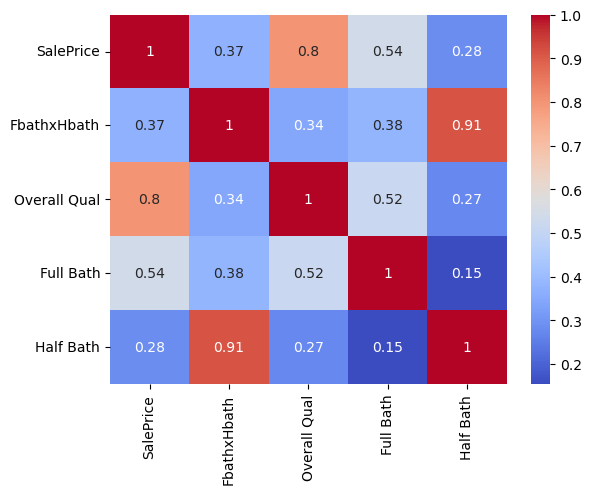

In [25]:
sns.heatmap(train[['SalePrice', 'FbathxHbath', 'Overall Qual', 'Full Bath', 'Half Bath']].corr(),
           cmap='coolwarm', annot=True)

### Polynomial Features

In [26]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [72]:
X_poly = poly.fit_transform(train.drop(columns=['Id', 'SalePrice']))
X_poly = pd.DataFrame(X_poly)
X_poly['Id'] = train['Id']
X_poly['SalePrice'] = train['SalePrice']

In [74]:
X_poly

0       1    2    3       4       5       6       7       8    9  \
0      6.0  1976.0  2.0  1.0   475.0   725.0  1479.0   725.0   754.0  2.0   
1      7.0  1996.0  2.0  1.0   559.0   913.0  2122.0   913.0  1209.0  2.0   
2      5.0  1953.0  1.0  0.0   246.0  1057.0  1057.0  1057.0     0.0  0.0   
3      5.0  2006.0  2.0  1.0   400.0   384.0  1444.0   744.0   700.0  2.0   
4      6.0  1900.0  2.0  0.0   484.0   676.0  1445.0   831.0   614.0  0.0   
5      6.0  1966.0  2.0  1.0   578.0  1517.0  1888.0  1888.0     0.0  2.0   
6      6.0  2005.0  2.0  0.0   525.0   547.0  1072.0  1072.0     0.0  0.0   
7      5.0  1959.0  1.0  0.0   531.0  1188.0  1188.0  1188.0     0.0  0.0   
8      5.0  1952.0  1.0  0.0   420.0   924.0   924.0   924.0     0.0  0.0   
9      5.0  1969.0  1.0  2.0   504.0  1040.0  2080.0  1040.0  1040.0  2.0   
10     6.0  1971.0  1.0  1.0   264.0   483.0   987.0   483.0   504.0  1.0   
11     7.0  2005.0  2.0  0.0   632.0  1208.0  1208.0  1208.0     0.0  0.0   
12     5.0  1880.0  1.0  0.0   576.0     0.0  2016.0  1288.0   728.0  0.0   
13     8.0  1999.0  2.0  1.0   480.0   960.0  1607.0   962.0   645.0  2.0   
14     7.0  2007.0  2.0  0.0   610.0  1351.0  1361.0  1361.0     0.0  0.0   
15     5.0  2004.0  2.0  0.0   624.0  1430.0  1430.0  1430.0     0.0  0.0   
16     5.0  1916.0  1.0  0.0   513.0   624.0  1344.0   624.0   720.0  0.0   
17     5.0  1963.0  1.0  0.0   480.0  1121.0  1121.0  1121.0     0.0  0.0   
18     6.0  1977.0  1.0  1.0   528.0   660.0  1285.0  1285.0     0.0  1.0   
19     7.0  2009.0  2.0  1.0   614.0   756.0  1547.0   764.0   783.0  2.0   
20     5.0  1968.0  1.0  0.0   450.0   894.0   894.0   894.0     0.0  0.0   
21     8.0  2000.0  2.0  0.0   499.0  1501.0  1659.0  1659.0     0.0  0.0   
22     8.0  2005.0  2.0  1.0   575.0  1209.0  2253.0  1209.0  1044.0  2.0   
23     6.0  1992.0  2.0  0.0   420.0  1168.0  1187.0  1187.0     0.0  0.0   
24     5.0  1955.0  1.0  0.0   572.0  1056.0  1056.0  1056.0     0.0  0.0   
25     6.0  1961.0  2.0  0.0   530.0  1453.0  1453.0  1453.0     0.0  0.0   
26     5.0  1965.0  1.0  0.0   336.0   894.0   894.0   894.0     0.0  0.0   
27     5.0  1937.0  2.0  0.0   240.0   942.0  1938.0  1265.0   673.0  0.0   
28     5.0  1895.0  2.0  0.0     0.0   957.0  1991.0  1034.0   957.0  0.0   
29     5.0  1949.0  1.0  0.0   576.0   672.0   924.0   672.0   252.0  0.0   
30     8.0  1981.0  2.0  1.0   542.0  2524.0  2524.0  2524.0     0.0  2.0   
31     8.0  1929.0  1.0  0.0   400.0   792.0  1517.0   792.0   725.0  0.0   
32     8.0  1995.0  1.0  1.0   481.0  1494.0  1494.0  1494.0     0.0  1.0   
33     6.0  1952.0  1.0  0.0   410.0   948.0   948.0   948.0     0.0  0.0   
34     8.0  2007.0  2.0  0.0   826.0  1705.0  1718.0  1718.0     0.0  0.0   
35     6.0  1958.0  1.0  0.0   384.0   160.0  1142.0  1142.0     0.0  0.0   
36     5.0  1977.0  2.0  0.0   336.0   757.0  1475.0   925.0   550.0  0.0   
37     6.0  1977.0  2.0  0.0   546.0  1844.0  1844.0  1844.0     0.0  0.0   
38     7.0  1973.0  1.0  1.0   528.0  1242.0  1242.0  1242.0     0.0  1.0   
39     5.0  1994.0  1.0  0.0   384.0   990.0   990.0   990.0     0.0  0.0   
40     5.0  1965.0  1.0  1.0   276.0  1256.0  1256.0  1256.0     0.0  1.0   
41    10.0  2006.0  2.0  1.0   850.0  2076.0  2076.0  2076.0     0.0  2.0   
42     5.0  1978.0  1.0  0.0   602.0  1097.0  1110.0  1110.0     0.0  0.0   
43     5.0  1954.0  2.0  0.0   352.0  1050.0  1795.0  1050.0   745.0  0.0   
44     5.0  1965.0  1.0  0.0   384.0  1040.0  1040.0  1040.0     0.0  0.0   
45     8.0  1935.0  1.0  1.0   786.0   608.0  1873.0   983.0   890.0  1.0   
46     5.0  1941.0  2.0  0.0   660.0   984.0  1604.0   984.0   620.0  0.0   
47     7.0  1931.0  1.0  1.0   270.0   776.0  1502.0   851.0   651.0  1.0   
48     5.0  1954.0  1.0  0.0   280.0  1056.0  1063.0  1063.0     0.0  0.0   
49     7.0  2003.0  2.0  1.0   474.0   764.0  1626.0   764.0   862.0  2.0   
50     6.0  2000.0  2.0  1.0   440.0   756.0  1524.0   768.0   756.0  2.0   
51   

In [76]:
X_poly.to_csv('../datasets/Transforms Xtrain.csv', index=False)

In [62]:
train

Id  Overall Qual  Year Built  Full Bath  Half Bath  Garage Area  \
0      109             6        1976          2          1        475.0   
1      544             7        1996          2          1        559.0   
2      153             5        1953          1          0        246.0   
3      318             5        2006          2          1        400.0   
4      255             6        1900          2          0        484.0   
5      138             6        1966          2          1        578.0   
6     2827             6        2005          2          0        525.0   
7      145             5        1959          1          0        531.0   
8     1942             5        1952          1          0        420.0   
9     1956             5        1969          1          2        504.0   
10    1044             6        1971          1          1        264.0   
11    2752             7        2005          2          0        632.0   
12     807             5        1880          1          0        576.0   
13    1177             8        1999          2          1        480.0   
14    1480             7        2007          2          0        610.0   
15     324             5        2004          2          0        624.0   
16    1311             5        1916          1          0        513.0   
17     770             5        1963          1          0        480.0   
18    2063             6        1977          1          1        528.0   
19      69             7        2009          2          1        614.0   
20    2062             5        1968          1          0        450.0   
21     351             8        2000          2          0        499.0   
22    2393             8        2005          2          1        575.0   
23      12             6        1992          2          0        420.0   
24    2339             5        1955          1          0        572.0   
25     624             6        1961          2          0        530.0   
26      86             5        1965          1          0        336.0   
27    1534             5        1937          2          0        240.0   
28    2243             5        1895          2          0          0.0   
29    1957             5        1949          1          0        576.0   
30     380             8        1981          2          1        542.0   
31    2860             8        1929          1          0        400.0   
32    2517             8        1995          1          1        481.0   
33    1933             6        1952          1          0        410.0   
34     820             8        2007          2          0        826.0   
35     675             6        1958          1          0        384.0   
36    2910             5        1977          2          0        336.0   
37      21             6        1977          2          0        546.0   
38    1873             7        1973          1          1        528.0   
39    2125             5        1994          1          0        384.0   
40    1489             5        1965          1          1        276.0   
41    2383            10        2006          2          1        850.0   
42     983             5        1978          1          0        602.0   
43    1325             5        1954          2          0        352.0   
44    1378             5        1965          1          0        384.0   
45    1537             8        1935          1          1        786.0   
46     905             5        1941          2          0        660.0   
47    1532             7        1931          1          1        270.0   
48     132             5        1954          1          0        280.0   
49    1078             7        2003          2          1        474.0   
50    2511             6        2000          2          1        440.0   
51     912             4        1928          2          0        576.0   
52    2351             7        1

In [63]:
test

Id  Overall Qual  Year Built  Full Bath  Half Bath  Garage Area  \
0    2658             6        1910          2          0          440   
1    2718             5        1977          2          0          580   
2    2414             7        2006          2          1          426   
3    1989             5        1923          1          0          480   
4     625             6        1963          1          1          514   
5     333             4        1972          1          1          286   
6    1327             4        1958          1          0          308   
7     858             5        1977          1          1          252   
8      95             7        2004          2          1          588   
9    1568             6        1977          2          0          473   
10   2482             6        1991          2          0          484   
11   1364             6        1925          1          0          320   
12   2584             6        1954          1          0          451   
13    818             7        2000          4          2          820   
14   2673             6        1924          1          0          240   
15   2089             5        1957          1          0          252   
16   1297             6        1940          2          0          828   
17    790             5        1956          1          0          340   
18   2616             6        1961          2          0          418   
19    720             8        1882          1          1          424   
20    222             5        1968          1          0          270   
21    557             5        1961          1          0          732   
22   1148             6        1993          2          0          533   
23   2766             6        1969          1          0          540   
24    534             7        2007          1          1          576   
25   1452             5        1972          1          0          352   
26    630             4        1920          2          0          368   
27   2648             5        1880          1          0          240   
28    125             6        1963          1          0          480   
29   1904             3        1945          1          0            0   
30   1670             4        1971          1          0          684   
31    756             4        1925          1          0          539   
32    717             7        1880          1          1          864   
33   1032             5        1973          1          1          439   
34    852             7        2001          2          0          608   
35   1731             7        2006          2          0          454   
36   2639             4        1920          1          0          162   
37   2071             4        1945          1          0          460   
38   1267             5        1953          1          0          414   
39   1851             7        1999          2          0          625   
40    567             6        2009          2          1          528   
41   2439             7        1998          2          1          431   
42   1898             5        1959          1          0          624   
43    647             5        1951          1          0          288   
44   2256             7        1987          2          0          512   
45    979             4        1970          1          1            0   
46   1444             7        2001          2          1          608   
47   2485             5        1965          1          0          300   
48    157             5        1956          1          0          308   
49     88             5        1963          1          1          308   
50   2003             5        1930          1          0          160   
51    186             8        1890          3          0          624   
52   1425             8        2007          2          0          864   
53   2695  

In [64]:
Xtest_poly = poly.transform(test.drop(columns=['Id']))

In [69]:
Xtest_poly = pd.DataFrame(Xtest_poly)
Xtest_poly['Id'] = test['Id']

In [77]:
Xtest_poly.to_csv('../datasets/Transforms Xtest.csv', index=False)

### Standard Scalar

### One Hot Encoder